In [1]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
dataset=data.frame(read.csv(url, header = TRUE, sep = ","))

In [2]:
head(dataset,7)

X39,State.gov,X77516,Bachelors,X13,Never.married,Adm.clerical,Not.in.family,White,Male,X2174,X0,X40,United.States,X..50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [3]:
print(colnames(dataset))

 [1] "X39"           "State.gov"     "X77516"        "Bachelors"    
 [5] "X13"           "Never.married" "Adm.clerical"  "Not.in.family"
 [9] "White"         "Male"          "X2174"         "X0"           
[13] "X40"           "United.States" "X..50K"       


In [9]:
options(width=60)
print(dataset[6,])

  X39 State.gov X77516 Bachelors X13          Never.married
6  49   Private 160187       9th   5  Married-spouse-absent
    Adm.clerical  Not.in.family  White    Male X2174 X0 X40
6  Other-service  Not-in-family  Black  Female     0  0  16
  United.States X..50K
6       Jamaica  <=50K


In [13]:
sort(unique(dataset$X13))

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16

In [15]:
sort(unique(dataset$Bachelors))

[1]  10th          11th          12th          1st-4th     
 [5]  5th-6th       7th-8th       9th           Assoc-acdm  
 [9]  Assoc-voc     Bachelors     Doctorate     HS-grad     
[13]  Masters       Preschool     Prof-school   Some-college
16 Levels:  10th  11th  12th  1st-4th  5th-6th ...  Some-college

In [19]:
as.character(unique(dataset$X..50K))

[1] " <=50K" " >50K"

In [40]:
edu=dataset$X13
income=dataset$X..50K
newdata=data.frame(edu,income)
print(head(newdata,8))

  edu income
1  13  <=50K
2   9  <=50K
3   7  <=50K
4  13  <=50K
5  14  <=50K
6   5  <=50K
7   9   >50K
8  14   >50K


In [24]:
library(plyr)

In [47]:
P = revalue(income,(c(" <=50K"=0)))
Q = revalue(P,(c(" >50K"=1)))
income = as.numeric(as.character(Q))
newdata = data.frame(edu,income)
print(head(newdata,8))

  edu income
1  13      0
2   9      0
3   7      0
4  13      0
5  14      0
6   5      0
7   9      1
8  14      1


In [48]:
nvals=nrow(newdata)
ind=sample(1:nvals, .75*nvals)

train=newdata[ind,]
test=newdata[-ind,]

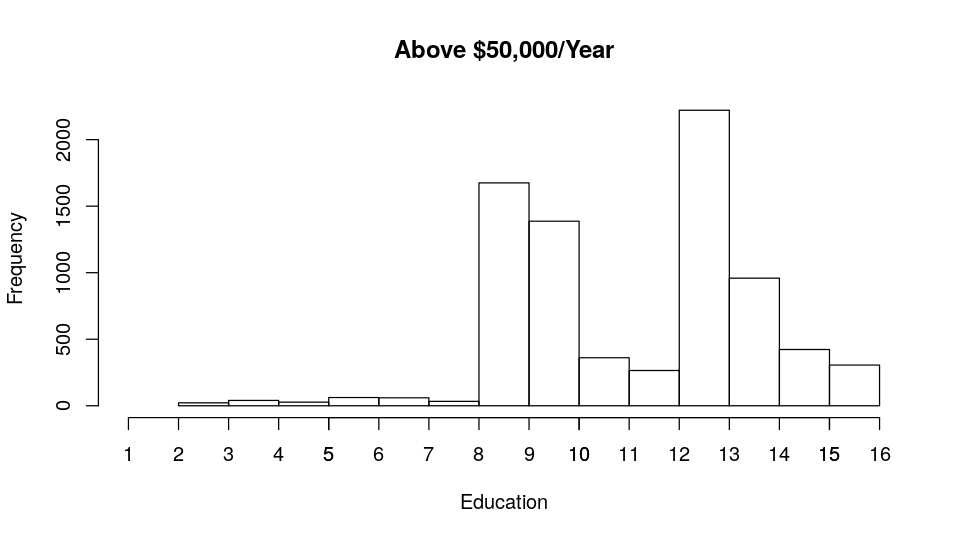

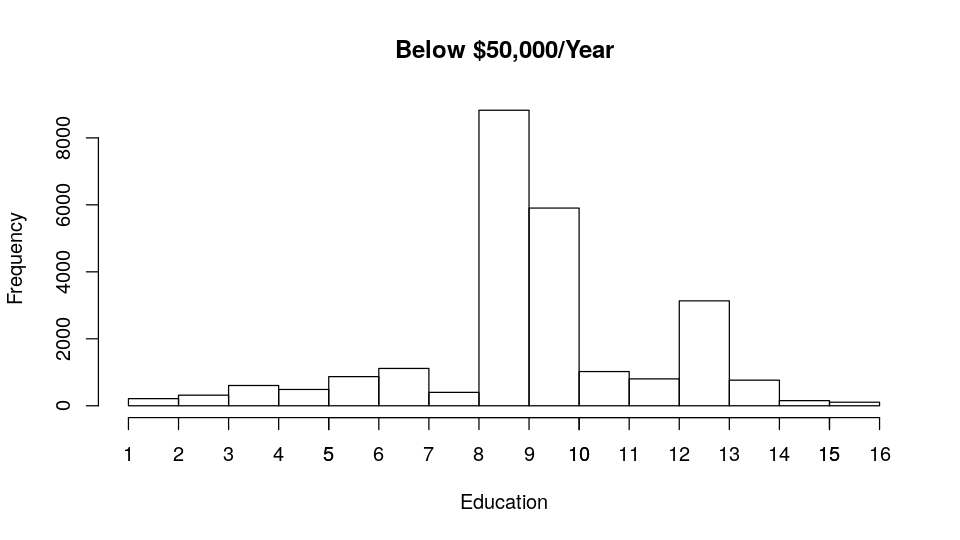

In [66]:
hiincome=newdata[newdata$income==1,]
options(repr.plot.width=8, repr.plot.height=4.5)
#pdf("edu-vis-inc-histograms.pdf",width=7,height=4)
hist(hiincome$edu,main="Above $50,000/Year",xlab="Education", xlim=c(1,16))
axis(side=1,at=seq(1,16))
loincome=newdata[newdata$income==0,]
hist(loincome$edu, main="Below $50,000/Year", xlab="Education")
axis(side=1,at=seq(1,16))
#dev.off()

## Do the logistic regression

In [67]:
model=glm(income~edu, data=train, family=binomial)

In [68]:
print(model)


Call:  glm(formula = income ~ edu, family = binomial, data = train)

Coefficients:
(Intercept)          edu  
    -5.0019       0.3628  

Degrees of Freedom: 24419 Total (i.e. Null);  24418 Residual
Null Deviance:	    27000 
Residual Deviance: 24000 	AIC: 24000


In [69]:
edu=seq(1,16,by=.1)
predictinput=data.frame(edu)
pre.model=predict(model,newdata=predictinput, type="response")

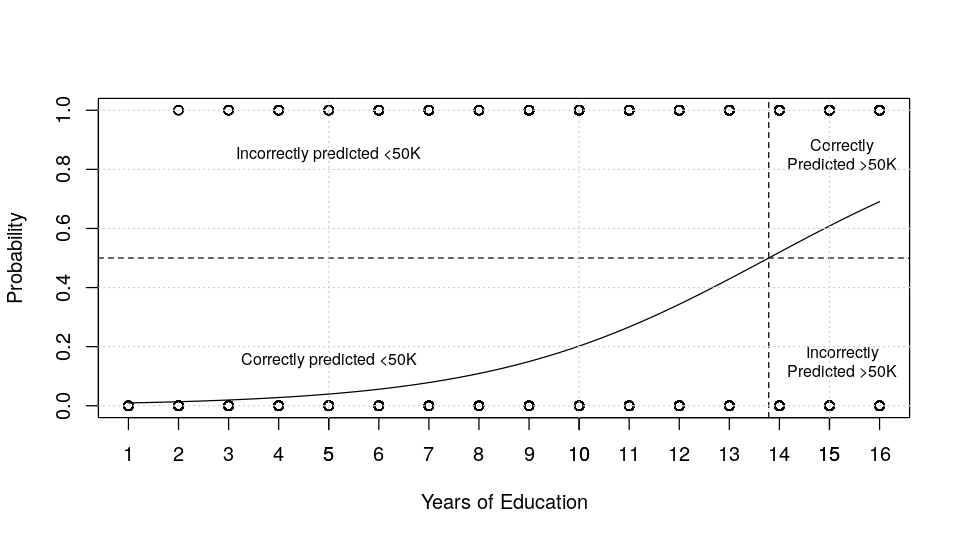

In [91]:
#pdf("logistic-regression-income-edu.pdf", width=8,height=4)
options(repr.plot.width=8, repr.plot.height=4.5)
plot(edu,pre.model,type="l",xlab="Years of Education",
     ylab="Probability", ylim=c(0,1))
points(train$edu, train$income)
abline(h=c(.5), v=c(5.0019/.3628), lty="dashed")
text(5,0.85,"Incorrectly predicted <50K",cex=.8)
text(5,0.15,"Correctly predicted <50K",cex=.8)
text(15.25,0.15,"Incorrectly\nPredicted >50K", cex=.8)
text(15.25,0.85,"Correctly\nPredicted >50K", cex=.8)
axis(side=1,at=seq(1,16))
grid()
#dev.off()

In [92]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [93]:
pre=predict(model,newdata=test,type="response")

In [94]:
levels(as.factor(as.numeric(pre>.5)))

[1] "0" "1"

In [ ]:
levels(as.factor(test$income))

In [95]:
confusionMatrix(data=as.factor(as.numeric(pre>.5)),
               reference=as.factor(test$income))

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5941 1511
         1  256  432
                                          
               Accuracy : 0.7829          
                 95% CI : (0.7738, 0.7918)
    No Information Rate : 0.7613          
    P-Value [Acc > NIR] : 2.011e-06       
                                          
                  Kappa : 0.2326          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9587          
            Specificity : 0.2223          
         Pos Pred Value : 0.7972          
         Neg Pred Value : 0.6279          
             Prevalence : 0.7613          
         Detection Rate : 0.7299          
   Detection Prevalence : 0.9155          
      Balanced Accuracy : 0.5905          
                                          
       'Positive' Class : 0               
                                          

In [ ]:
#install.packages("pROC")

In [102]:
library(pROC)

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [108]:
r=roc(test$income,pre)
print(r)


Call:
roc.default(response = test$income, predictor = pre)

Data: pre in 6197 controls (test$income 0) < 1943 cases (test$income 1).
Area under the curve: 0.7206


In [104]:
f=roc(test$income,pre)
fallout=1-f$spec
recall=f$sens

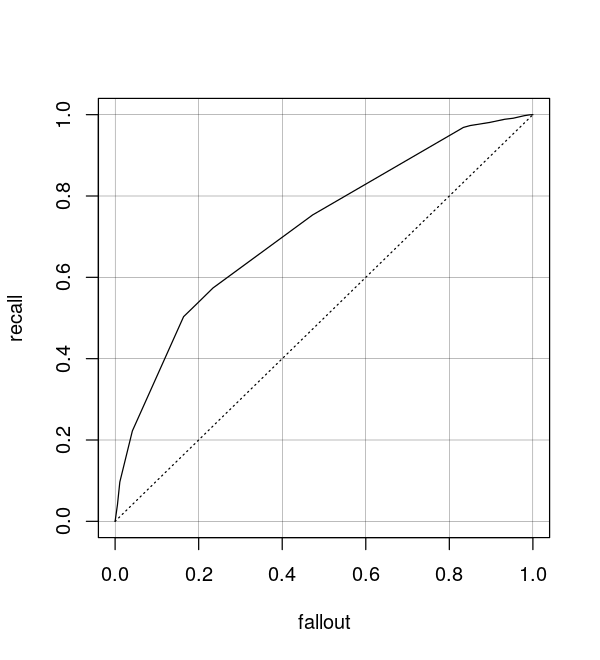

In [109]:
options(repr.plot.width=5, repr.plot.height=5.5)
#pdf("ROC-edu-income.pdf")
plot(fallout,recall,type="l")
lines(0:1,0:1,lty="dotted")
abline(h=seq(0,1,by=.2), v=seq(0,1,by=.2), lwd=.2)
#dev.off()

## Code to build ROC and AUC from first principals

In [96]:
ev=test$income

In [97]:
pv=pre

In [98]:
my.roc=function(Examples,Pred){
    P=sum(Examples==1)
    N=sum(Examples==0)
    N.pts=P+N
    # sort data by pred
    temp=data.frame(Examples,Pred)
    temp=temp[order(-Pred),]
    #
    L=temp$Examples
    f=temp$Pred
    #
    FP=0; TP=0;  
    R.x=rep(0,N.pts)
    R.y=rep(0,N.pts)
    f.previous=-99999 # - infinity
    j=1
    #
    AUC=0
    for (i in 1:N.pts){
        if(f[i]!=f.previous){
            R.x[j]=FP/N
            R.y[j]=TP/P
            j=j+1
            f.previous=f[i]
        }
        if(L[i]>0.5){
            TP=TP+1
        }
        else{
            FP=FP+1
        }
    }
    R.x[j]=FP/N
    R.y[j]=TP/P 
    fallout=head(R.x,j)
    recall=head(R.y,j)
    data.frame(fallout,recall)
}

r=my.roc(ev,pv)

In [99]:
my.AUC=function(roc){
    x=roc$fallout
    y=roc$recall
    AUC=0
    for (i in 2:nrow(roc)){
        AUC = AUC + 0.5*abs(x[i]-x[i-1])*(y[i]+y[i-1])
    }
    AUC
}
my.AUC(r)

[1] 0.7205533

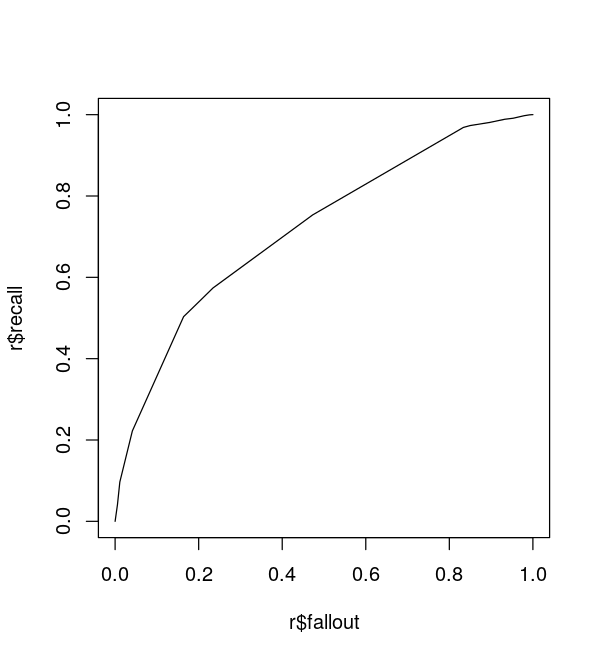

In [101]:
options(repr.plot.width=5, repr.plot.height=5.5)
plot(r$fallout,r$recall,type="l")